In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
df_original = pd.read_csv('DXG Historical Data.csv')

In [3]:
df = df_original[::-1].reset_index()[['Price']]
df['Price'] = df['Price'].str.replace(',', '')

In [4]:
df

,Price
0,16800.00
1,16850.00
2,16850.00
3,16800.00
4,16550.00
...,...
1843,6141.40
1844,6141.40
1845,6091.50
1846,6166.40


In [5]:
train82 = df[:int(0.8*len(df))]
test82 = df[int(0.8*len(df)):]

train73 = df[:int(0.7*len(df))]
test73 = df[int(0.7*len(df)):]

train91 = df[:int(0.9*len(df))]
test91 = df[int(0.9*len(df)):]

In [6]:
train82

,Price
0,16800.00
1,16850.00
2,16850.00
3,16800.00
4,16550.00
...,...
1473,15451.20
1474,16271.60
1475,15861.40
1476,17023.70


In [7]:
X_train82 = np.array(train82.index).reshape(-1, 1)
y_train82 = train82['Price']
X_test82 = np.array(test82.index).reshape(-1, 1)
y_test82 = test82['Price']

X_train73 = np.array(train73.index).reshape(-1, 1)
y_train73 = train73['Price']
X_test73 = np.array(test73.index).reshape(-1, 1) 
y_test73 = test73['Price']

X_train91 = np.array(train91.index).reshape(-1, 1)
y_train91 = train91['Price']
X_test91 = np.array(test91.index).reshape(-1, 1)
y_test91 = test91['Price']

In [32]:
X_test82

array([[1478],
       [1479],
       [1480],
       [1481],
       [1482],
       [1483],
       [1484],
       [1485],
       [1486],
       [1487],
       [1488],
       [1489],
       [1490],
       [1491],
       [1492],
       [1493],
       [1494],
       [1495],
       [1496],
       [1497],
       [1498],
       [1499],
       [1500],
       [1501],
       [1502],
       [1503],
       [1504],
       [1505],
       [1506],
       [1507],
       [1508],
       [1509],
       [1510],
       [1511],
       [1512],
       [1513],
       [1514],
       [1515],
       [1516],
       [1517],
       [1518],
       [1519],
       [1520],
       [1521],
       [1522],
       [1523],
       [1524],
       [1525],
       [1526],
       [1527],
       [1528],
       [1529],
       [1530],
       [1531],
       [1532],
       [1533],
       [1534],
       [1535],
       [1536],
       [1537],
       [1538],
       [1539],
       [1540],
       [1541],
       [1542],
       [1543],
       [15

In [8]:
y_test82

1478    17980.80
1479    18561.90
1480    18322.70
1481    19348.20
1482    20066.00
          ...   
1843     6141.40
1844     6141.40
1845     6091.50
1846     6166.40
1847     6066.50
Name: Price, Length: 370, dtype: object

In [11]:
model82 = LinearRegression().fit(X_train82, y_train82)
model82.intercept_, model82.coef_

(20370.309738504144, array([-4.00804376]))

In [12]:
model73 = LinearRegression().fit(X_train73, y_train73)
model73.intercept_, model73.coef_

(21295.848738122648, array([-6.01177466]))

In [13]:
model91 = LinearRegression().fit(X_train91, y_train91)
model91.intercept_, model91.coef_

(19899.416123476454, array([-3.0428548]))

In [16]:
y_pred82 = model82.predict(X_test82)
y_pred73 = model73.predict(X_test73)
y_pred91 = model91.predict(X_test91)

In [45]:
last_index =  df.index[-1]

In [49]:
last30_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_forecast82_next_30_days = model82.predict(x_next_30_days)
y_forecast73_next_30_days = model73.predict(x_next_30_days)
y_forecast91_next_30_days = model91.predict(x_next_30_days)

In [51]:
last60_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_forecast82_next_60_days = model82.predict(x_next_60_days)
y_forecast73_next_60_days = model73.predict(x_next_60_days)
y_forecast91_next_60_days = model91.predict(x_next_60_days)

In [52]:
last90_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_forecast82_next_90_days = model82.predict(x_next_90_days)
y_forecast73_next_90_days = model73.predict(x_next_90_days)
y_forecast91_next_90_days = model91.predict(x_next_90_days)

In [18]:
print(y_test82)

1478    17980.80
1479    18561.90
1480    18322.70
1481    19348.20
1482    20066.00
          ...   
1843     6141.40
1844     6141.40
1845     6091.50
1846     6166.40
1847     6066.50
Name: Price, Length: 370, dtype: object


In [19]:
rmse = np.sqrt(mean_squared_error(y_test82, y_pred82))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test82, y_pred82)
print("MAE:", mae)
y_test82_arr = np.array(y_test82).astype(float)
mape = np.mean(np.abs((y_test82_arr - y_pred82) / y_test82_arr)) * 100
print("MAPE:", mape)

RMSE: 4592.266782398225
MAE: 3998.0721666618106
MAPE: 32.18047222322694


In [55]:
rmse = np.sqrt(mean_squared_error(y_test73, y_pred73))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test73, y_pred73)
print("MAE:", mae)
y_test73_arr = np.array(y_test73).astype(float)
mape = np.mean(np.abs((y_test73_arr - y_pred73) / y_test73_arr)) * 100
print("MAPE:", mape)

RMSE: 4847.4500805169855
MAE: 3675.0894364451697
MAPE: 22.372699641567355


In [56]:
rmse = np.sqrt(mean_squared_error(y_test91, y_pred91))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test91, y_pred91)
print("MAE:", mae)
y_test91_arr = np.array(y_test91).astype(float)
mape = np.mean(np.abs((y_test91_arr - y_pred91) / y_test91_arr)) * 100
print("MAPE:", mape)

RMSE: 4928.932964204482
MAE: 4663.3654166610395
MAPE: 52.44507584997058


In [20]:
y_train82

0       16800.00
1       16850.00
2       16850.00
3       16800.00
4       16550.00
          ...   
1473    15451.20
1474    16271.60
1475    15861.40
1476    17023.70
1477    16750.20
Name: Price, Length: 1478, dtype: object

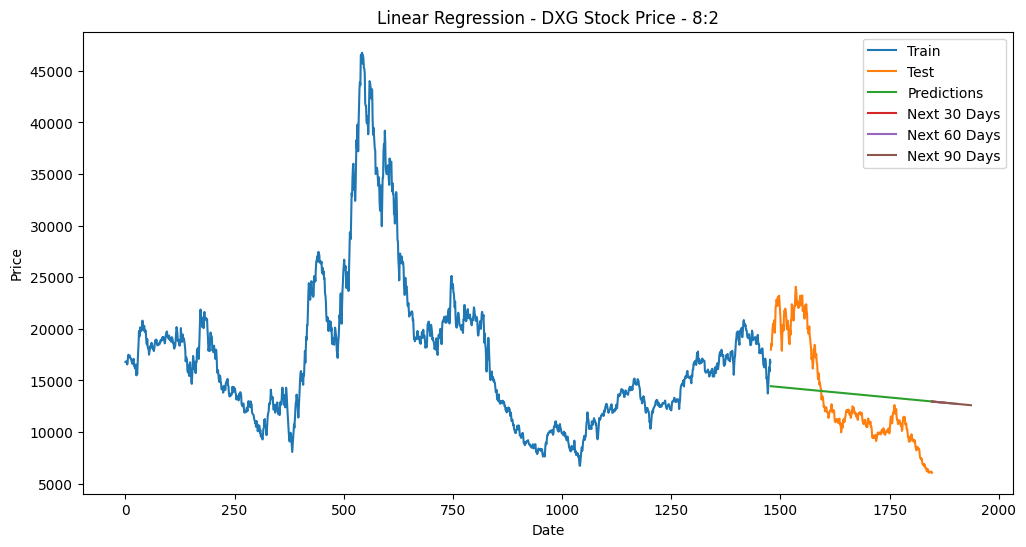

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(train82.index, np.array(train82['Price']).astype(float))
plt.plot(test82.index, np.array(test82['Price']).astype(float))
plt.plot(test82.index, y_pred82)
plt.plot(last30_data, y_forecast82_next_30_days)
plt.plot(last60_data, y_forecast82_next_60_days)
plt.plot(last90_data, y_forecast82_next_90_days)
plt.title('Linear Regression - DXG Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days', 'Next 60 Days', 'Next 90 Days'])
plt.show()

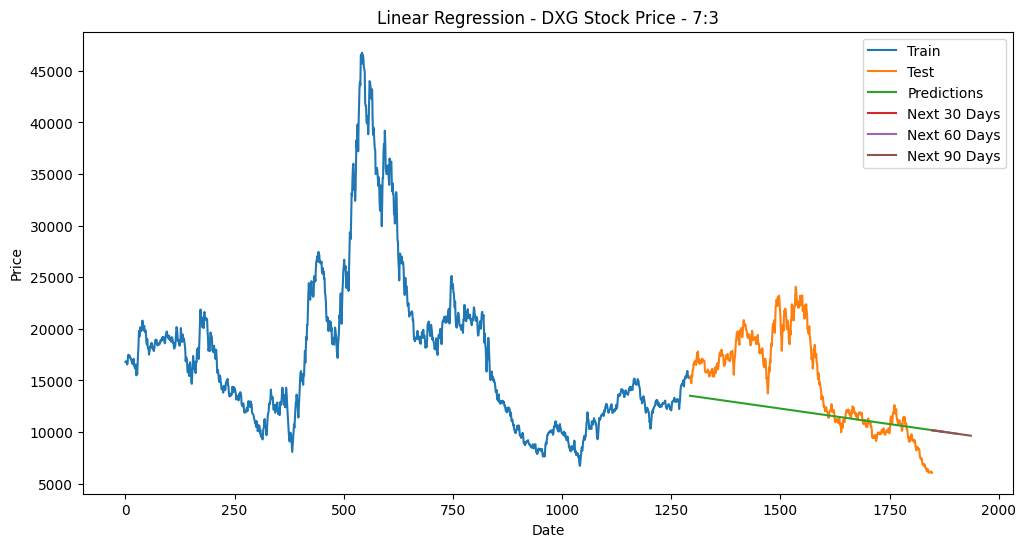

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(train73.index, np.array(train73['Price']).astype(float))
plt.plot(test73.index, np.array(test73['Price']).astype(float))
plt.plot(test73.index, y_pred73)
plt.plot(last30_data, y_forecast73_next_30_days)
plt.plot(last60_data, y_forecast73_next_60_days)
plt.plot(last90_data, y_forecast73_next_90_days)
plt.title('Linear Regression - DXG Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days', 'Next 60 Days', 'Next 90 Days'])
plt.show()

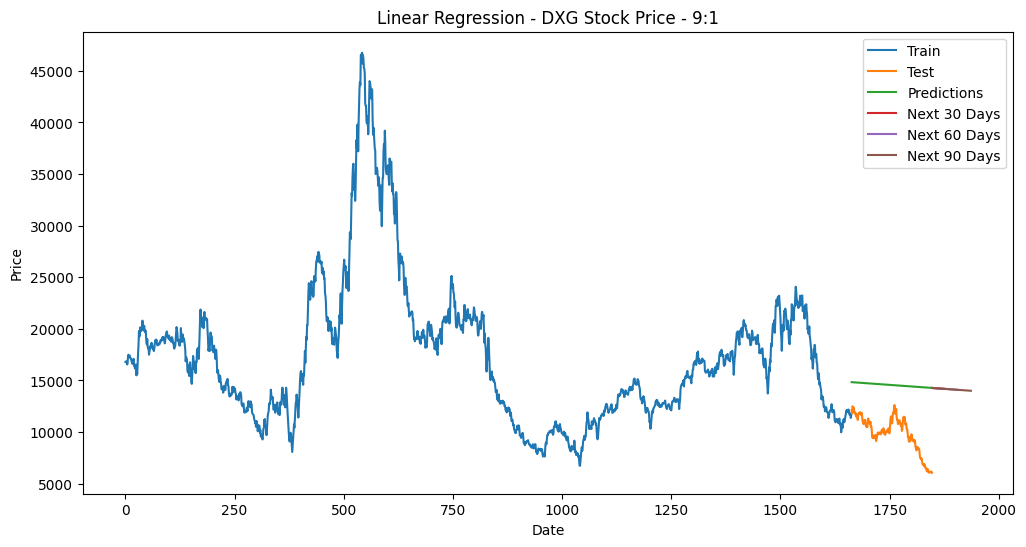

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(train91.index, np.array(train91['Price']).astype(float))
plt.plot(test91.index, np.array(test91['Price']).astype(float))
plt.plot(test91.index, y_pred91)
plt.plot(last30_data, y_forecast91_next_30_days)
plt.plot(last60_data, y_forecast91_next_60_days)
plt.plot(last90_data, y_forecast91_next_90_days)
plt.title('Linear Regression - DXG Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days', 'Next 60 Days', 'Next 90 Days'])
plt.show()